# HOME CREDIT DEFAULT

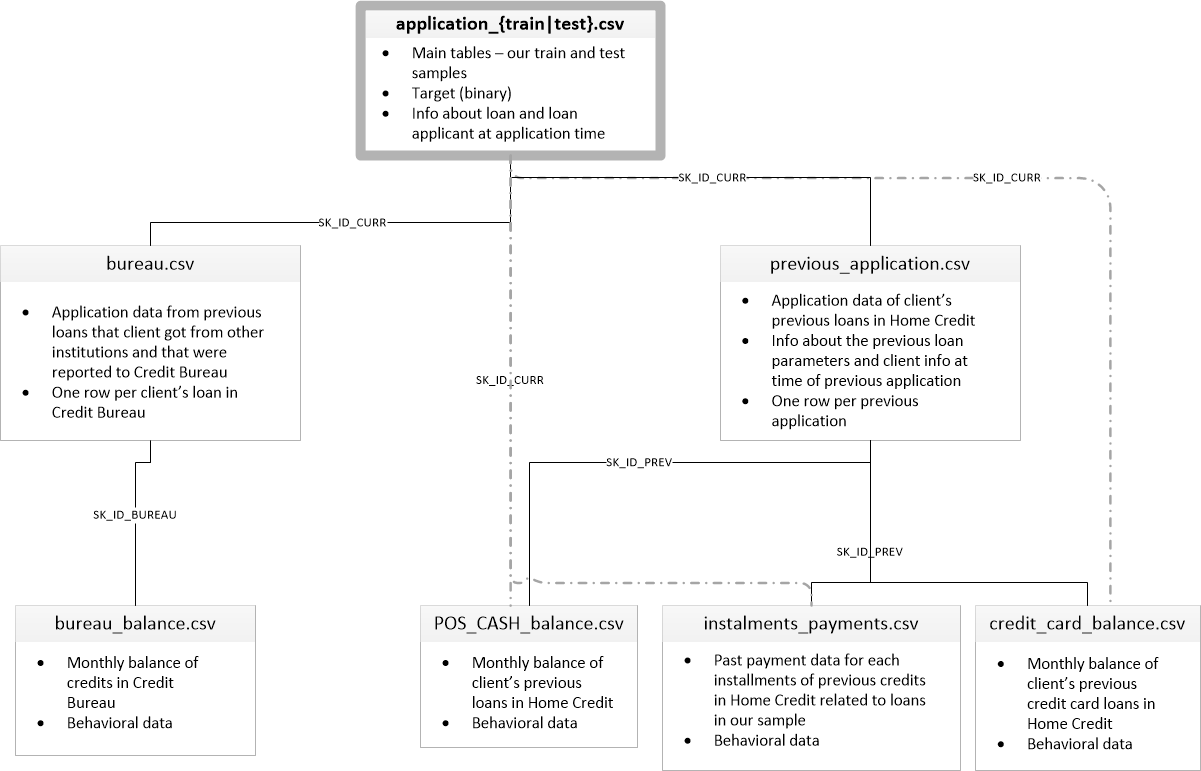

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 300)

In [2]:
%run ./Donnees.ipynb

%run ./EDA.ipynb

%run ./Featuring_engineering.ipynb

%run ./Modélisation.ipynb


In [3]:
Fichier = Donnees()
appli_train = Fichier.import_data('application_train.csv')
appli_test = Fichier.import_data('application_test.csv')

In [4]:
bureau = Fichier.import_data('bureau.csv')
bureau_balance = Fichier.import_data('bureau_balance.csv')
credit_card_balance= Fichier.import_data('credit_card_balance.csv')
installments_payments = Fichier.import_data('installments_payments.csv')
POS_CASH_balance = Fichier.import_data('POS_CASH_balance.csv')
previous_application = Fichier.import_data('previous_application.csv')
sample_submission = Fichier.import_data('sample_submission.csv')

# Feature Engineering et Fusion des dataframes

In [5]:
files_list_ini = [appli_train,appli_test,bureau,bureau_balance,credit_card_balance,installments_payments,POS_CASH_balance,previous_application]
files_list_name_ini = ['appli_train','appli_test','bureau','bureau_balance','credit_card_balance','installments_payments','POS_CASH_balance','previous_application']

In [6]:
files_shape_ini = EDA().shape(files_list_ini,files_list_name_ini)
files_shape_ini

,nombre de lignes,nombre de colonnes,% valeurs manquantes
appli_train,307511.0,122.0,24.0
appli_test,48744.0,121.0,24.0
bureau,1716428.0,17.0,14.0
bureau_balance,27299925.0,3.0,0.0
credit_card_balance,3840312.0,23.0,7.0
installments_payments,13605401.0,8.0,0.0
POS_CASH_balance,10001358.0,8.0,0.0
previous_application,1670214.0,37.0,18.0


## Appli_train & Appli_test

In [7]:
appli_train_missvalue = appli_train.copy()
appli_test_missvalue = appli_test.copy()

In [8]:
appli_train_missvalue.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [9]:
del appli_train
del appli_test

In [10]:
#D'aprés l'EDA on supprime les colonnes ayant plus ou égale à 60% de valeurs manquantes pour appli_train et appli_test
appli_train_missvalue =  Feturing_engineering().supprimer_valeur_manquante(appli_train_missvalue, 60)
appli_test_missvalue =  Feturing_engineering().supprimer_valeur_manquante(appli_test_missvalue, 60)

In [11]:
EDA().shape([appli_train_missvalue,appli_test_missvalue],['appli_train_missvalue','appli_test_missvalue'])


,nombre de lignes,nombre de colonnes,% valeurs manquantes
appli_train_missvalue,307511.0,105.0,17.0
appli_test_missvalue,48744.0,104.0,17.0


In [12]:
#Il y a trois variables comprenant des catégories qui n'existe pas ou qui ne sont pas présent dans appli_test

index_XNA = appli_train_missvalue[appli_train_missvalue['CODE_GENDER']=='XNA'].index
appli_train_missvalue.drop(index_XNA, inplace = True)


index_Maternity_leave = appli_train_missvalue[appli_train_missvalue['NAME_INCOME_TYPE']=='Maternity leave'].index
appli_train_missvalue.drop(index_Maternity_leave, inplace = True)


index_Unknown = appli_train_missvalue[appli_train_missvalue['NAME_FAMILY_STATUS']=='Unknown'].index
appli_train_missvalue.drop(index_Unknown, inplace = True)


# Suppression des aberrations détectées chez les variables "OBS"
appli_train_missvalue['OBS_30_CNT_SOCIAL_CIRCLE'][appli_train_missvalue['OBS_30_CNT_SOCIAL_CIRCLE'] > 30] == np.nan
appli_train_missvalue['OBS_60_CNT_SOCIAL_CIRCLE'][appli_train_missvalue['OBS_60_CNT_SOCIAL_CIRCLE'] > 30] == np.nan
appli_test_missvalue['OBS_30_CNT_SOCIAL_CIRCLE'][appli_test_missvalue['OBS_30_CNT_SOCIAL_CIRCLE'] > 30] == np.nan
appli_test_missvalue['OBS_60_CNT_SOCIAL_CIRCLE'][appli_test_missvalue['OBS_60_CNT_SOCIAL_CIRCLE'] > 30] == np.nan


37465    False
38869    False
39671    False
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: bool

In [13]:
#D'après l'eda, on a vu que la variable 'AMT_INCOME_TOTAL' présentait une valeurs super élevée classé parmi ceux qui ne peuvent pas rembourser leur prêt. c'est aberrant
appli_train_missvalue = appli_train_missvalue[appli_train_missvalue['AMT_INCOME_TOTAL'] < 20000000]
appli_test_missvalue = appli_test_missvalue[appli_test_missvalue['AMT_INCOME_TOTAL'] < 20000000] 

In [14]:
#Je convertir les données d'age en jour par an de la variable 'DAYS_BIRTH'
appli_train_missvalue['DAYS_BIRTH'] = appli_train_missvalue['DAYS_BIRTH'].apply(Feturing_engineering().convert_age)
appli_test_missvalue['DAYS_BIRTH'] = appli_test_missvalue['DAYS_BIRTH'].apply(Feturing_engineering().convert_age)

In [15]:
pd.DataFrame(data = appli_train_missvalue['DAYS_BIRTH'].describe(include='all'))

,DAYS_BIRTH
count,307499.000000
mean,43.937207
std,11.956141
min,20.517808
25%,34.008219
50%,43.150685
75%,53.923288
max,69.120548


La moyenne des client est de 43 ans et la personne la plus agée a 69 ans

In [16]:
pd.DataFrame(appli_train_missvalue['DAYS_EMPLOYED'].describe(include='all'))

,DAYS_EMPLOYED
count,307499.000000
mean,63817.639869
std,141277.912020
min,-17912.000000
25%,-2760.000000
50%,-1213.000000
75%,-289.000000
max,365243.000000


In [17]:
# la valeur maximale fait parti des outliers, je la supprime
appli_train_missvalue['DAYS_EMPLOYED'].replace(365243, np.nan, inplace=True) 
appli_test_missvalue['DAYS_EMPLOYED'].replace(365243, np.nan, inplace=True) 

In [18]:
appli_train_missvalue['DAYS_EMPLOYED'] = appli_train_missvalue['DAYS_EMPLOYED'].apply(Feturing_engineering().convert_age)
appli_test_missvalue['DAYS_EMPLOYED'] = appli_test_missvalue['DAYS_EMPLOYED'].apply(Feturing_engineering().convert_age)

In [19]:
pd.DataFrame(appli_train_missvalue['DAYS_EMPLOYED'].describe(include='all'))

,DAYS_EMPLOYED
count,252125.000000
mean,6.531935
std,6.406446
min,-0.000000
25%,2.101370
50%,4.515068
75%,8.698630
max,49.073973


In [20]:
#creation de variable
appli_train_missvalue['CREDIT_TERM'] = appli_train_missvalue['AMT_CREDIT'] / appli_train_missvalue['AMT_ANNUITY'] 
appli_train_missvalue['CREDIT_TO_GOODS_RATIO'] = appli_train_missvalue['AMT_CREDIT'] / appli_train_missvalue['AMT_GOODS_PRICE']
appli_train_missvalue['ANNUITY_TO_INCOME_RATIO'] = appli_train_missvalue['AMT_ANNUITY'] / appli_train_missvalue['AMT_INCOME_TOTAL']
appli_train_missvalue['CREDIT_TO_INCOME_RATIO'] = appli_train_missvalue['AMT_CREDIT'] / appli_train_missvalue['AMT_INCOME_TOTAL']
appli_train_missvalue['INCOME_TO_EMPLOYED_RATIO'] = appli_train_missvalue['AMT_INCOME_TOTAL'] / appli_train_missvalue['DAYS_EMPLOYED']
appli_train_missvalue['INCOME_TO_BIRTH_RATIO'] = appli_train_missvalue['AMT_INCOME_TOTAL'] / appli_train_missvalue['DAYS_BIRTH']
appli_train_missvalue['EXT_SOURCES_PROD'] = appli_train_missvalue['EXT_SOURCE_1'] * appli_train_missvalue['EXT_SOURCE_2'] * appli_train_missvalue['EXT_SOURCE_3']
appli_train_missvalue['EXT_SOURCES_WEIGHTED'] = appli_train_missvalue.EXT_SOURCE_1 * 2 + appli_train_missvalue.EXT_SOURCE_2 * 1 + appli_train_missvalue.EXT_SOURCE_3 * 3

In [21]:
#creation de variable
appli_test_missvalue['CREDIT_TERM'] = appli_test_missvalue['AMT_CREDIT'] / appli_test_missvalue['AMT_ANNUITY'] 
appli_test_missvalue['CREDIT_TO_GOODS_RATIO'] = appli_test_missvalue['AMT_CREDIT'] / appli_test_missvalue['AMT_GOODS_PRICE']
appli_test_missvalue['ANNUITY_TO_INCOME_RATIO'] = appli_test_missvalue['AMT_ANNUITY'] / appli_test_missvalue['AMT_INCOME_TOTAL']
appli_test_missvalue['CREDIT_TO_INCOME_RATIO'] = appli_test_missvalue['AMT_CREDIT'] / appli_test_missvalue['AMT_INCOME_TOTAL']
appli_test_missvalue['INCOME_TO_EMPLOYED_RATIO'] = appli_test_missvalue['AMT_INCOME_TOTAL'] / appli_test_missvalue['DAYS_EMPLOYED']
appli_test_missvalue['INCOME_TO_BIRTH_RATIO'] = appli_test_missvalue['AMT_INCOME_TOTAL'] / appli_test_missvalue['DAYS_BIRTH']
appli_test_missvalue['EXT_SOURCES_PROD'] = appli_test_missvalue['EXT_SOURCE_1'] * appli_test_missvalue['EXT_SOURCE_2'] * appli_test_missvalue['EXT_SOURCE_3']
appli_test_missvalue['EXT_SOURCES_WEIGHTED'] = appli_test_missvalue.EXT_SOURCE_1 * 2 + appli_test_missvalue.EXT_SOURCE_2 * 1 + appli_test_missvalue.EXT_SOURCE_3 * 3

In [22]:
var_numerique_appli_train = appli_train_missvalue.select_dtypes(np.number)
var_categorique_appli_train = appli_train_missvalue.select_dtypes('object')

In [23]:
var_numerique_appli_test = appli_test_missvalue.select_dtypes(np.number)
var_categorique_appli_test = appli_test_missvalue.select_dtypes('object')

In [24]:
appli_train_missvalue[var_numerique_appli_train.columns] = Feturing_engineering().Imputation_valeur_manquante(appli_train_missvalue[var_numerique_appli_train.columns],var_numerique_appli_train)
appli_test_missvalue[var_numerique_appli_test.columns] = Feturing_engineering().Imputation_valeur_manquante(appli_test_missvalue[var_numerique_appli_test.columns],var_numerique_appli_test)

C:\Anaconda\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [25]:
appli_test_missvalue[var_categorique_appli_test.columns].isnull().sum()

NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
NAME_TYPE_SUITE                 911
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
OCCUPATION_TYPE               15605
WEEKDAY_APPR_PROCESS_START        0
ORGANIZATION_TYPE                 0
HOUSETYPE_MODE                23619
WALLSMATERIAL_MODE            23893
EMERGENCYSTATE_MODE           22209
dtype: int64

In [26]:
appli_train_missvalue[var_categorique_appli_train.columns] = Feturing_engineering().Imputation_valeur_manquante2(appli_train_missvalue[var_categorique_appli_train.columns],var_categorique_appli_train)

In [27]:
appli_test_missvalue[var_categorique_appli_test.columns] = Feturing_engineering().Imputation_valeur_manquante2(appli_test_missvalue[var_categorique_appli_test.columns],var_categorique_appli_test)

In [28]:
EDA().missing_values_table(appli_test_missvalue)

Your selected dataframe has 112 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [29]:
appli_train_missvalue[var_categorique_appli_train.columns] = Feturing_engineering().label_encoder(appli_train_missvalue[var_categorique_appli_train.columns])
appli_train_missvalue,new_cols_app_train = Feturing_engineering().one_hot_encoder(appli_train_missvalue)

<ipython-input-2-a6ca0b9a3324>:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file[col] = le.transform(file[col])


5 columns were label encoded.
les colonnes sont : ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'EMERGENCYSTATE_MODE']
123 columns were one hot encoded.


In [30]:
appli_test_missvalue[var_categorique_appli_test.columns] = Feturing_engineering().label_encoder(appli_test_missvalue[var_categorique_appli_test.columns])
appli_test_missvalue,new_cols_app_test = Feturing_engineering().one_hot_encoder(appli_test_missvalue)

5 columns were label encoded.
les colonnes sont : ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'EMERGENCYSTATE_MODE']
123 columns were one hot encoded.


<ipython-input-2-a6ca0b9a3324>:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file[col] = le.transform(file[col])


In [31]:
EDA().shape([appli_train_missvalue] ,['appli_train_missvalue'])

,nombre de lignes,nombre de colonnes,% valeurs manquantes
appli_train_missvalue,307499.0,226.0,0.0


In [32]:
EDA().missing_values_table(appli_train_missvalue)

Your selected dataframe has 226 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [33]:
EDA().shape([appli_test_missvalue] ,['appli_test_missvalue'])

,nombre de lignes,nombre de colonnes,% valeurs manquantes
appli_test_missvalue,48744.0,225.0,0.0


In [34]:
EDA().missing_values_table(appli_test_missvalue)

Your selected dataframe has 225 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


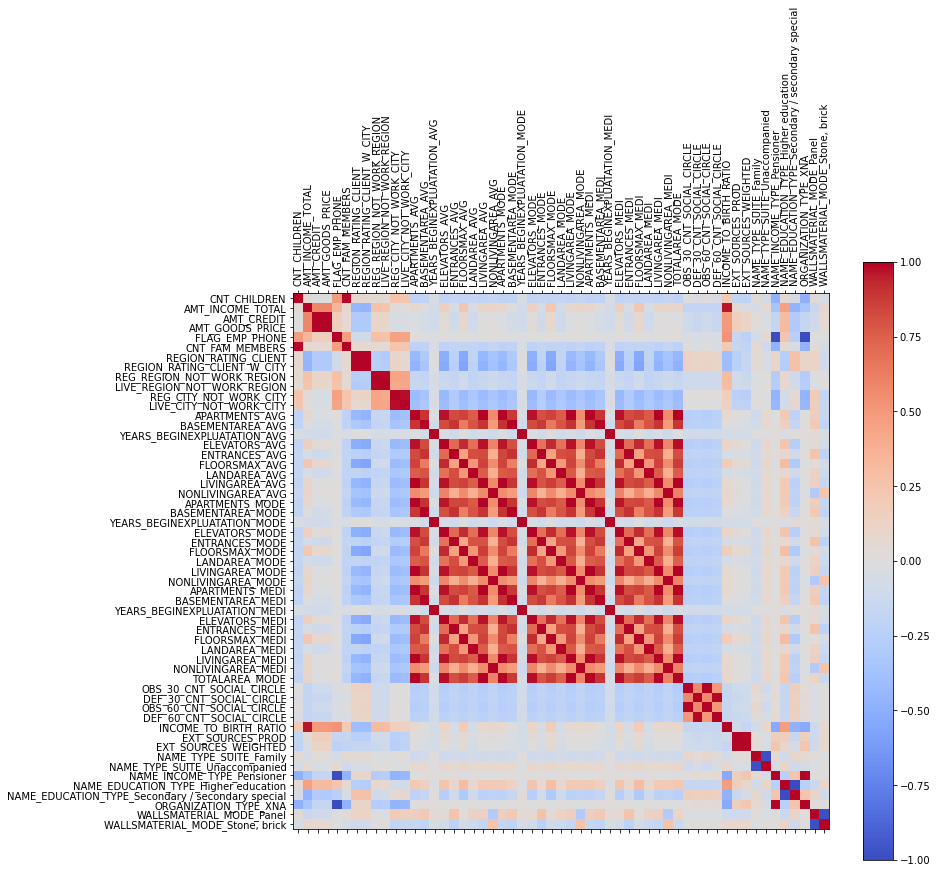

In [35]:
Feturing_engineering().correlation(appli_train_missvalue,12,11)

In [36]:
train_cleaned = appli_train_missvalue.copy()
test_cleaned = appli_test_missvalue.copy()

In [37]:
to_drop, train_cleaned = Feturing_engineering().suppr_corr(train_cleaned)

matrice de correlation head
There are 35 columns to remove.
################################################################################
['AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT_W_CITY', 'LIVE_REGION_NOT_WORK_REGION', 'LIVE_CITY_NOT_WORK_CITY', 'ELEVATORS_AVG', 'LIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'LANDAREA_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'LANDAREA_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'INCOME_TO_BIRTH_RATIO', 'EXT_SOURCES_WEIGHTED', 'NAME_TYPE_SUITE_Unaccompanied', 'NAME_INCOME_TYPE_Pensioner', 'NAME_EDUCATION_TYPE_Secondary / secondary special', 'ORGANIZATION_TYPE_XNA', 'WALLSMATERIAL_MODE_Stone, brick']
shape:  (307499, 191)


In [38]:
test_cleaned = test_cleaned.drop(to_drop, axis=1)

In [39]:
del appli_train_missvalue, appli_test_missvalue 

In [40]:
EDA().shape([train_cleaned,test_cleaned],['train_cleaned','test_cleaned'])

,nombre de lignes,nombre de colonnes,% valeurs manquantes
train_cleaned,307499.0,191.0,0.0
test_cleaned,48744.0,190.0,0.0


## Bureau

In [41]:
bureau_missvalue = bureau.copy()

In [42]:
del bureau

In [43]:
EDA().shape([bureau_missvalue] ,['bureau_missvalue'])

,nombre de lignes,nombre de colonnes,% valeurs manquantes
bureau_missvalue,1716428.0,17.0,14.0


In [44]:
bureau_missvalue.drop(['CREDIT_CURRENCY'],axis = 1, inplace = True)

In [45]:
EDA().shape([bureau_missvalue] ,['bureau_missvalue'])

,nombre de lignes,nombre de colonnes,% valeurs manquantes
bureau_missvalue,1716428.0,16.0,14.0


In [46]:
bureau_missvalue['DEBT_PERCENTAGE'] = bureau_missvalue['AMT_CREDIT_SUM'] / bureau_missvalue['AMT_CREDIT_SUM_DEBT']
bureau_missvalue['BUREAU_CREDIT_DEBT_RATIO'] = bureau_missvalue['AMT_CREDIT_SUM_DEBT'] / bureau_missvalue['AMT_CREDIT_SUM']

In [47]:
EDA().shape([bureau_missvalue] ,['bureau_missvalue'])

,nombre de lignes,nombre de colonnes,% valeurs manquantes
bureau_missvalue,1716428.0,18.0,15.0


In [48]:
var_numerique_bureau = bureau_missvalue.select_dtypes(np.number)
var_categorique_bureau = bureau_missvalue.select_dtypes('object')

In [49]:
EDA().missing_values_table(var_numerique_bureau)

Your selected dataframe has 16 columns.
There are 9 columns that have missing values.


,Missing Values,% of Total Values
AMT_ANNUITY,1226791,71.5
AMT_CREDIT_MAX_OVERDUE,1124488,65.5
DAYS_ENDDATE_FACT,633653,36.9
AMT_CREDIT_SUM_LIMIT,591780,34.5
DEBT_PERCENTAGE,314593,18.3
BUREAU_CREDIT_DEBT_RATIO,314593,18.3
AMT_CREDIT_SUM_DEBT,257669,15.0
DAYS_CREDIT_ENDDATE,105553,6.1
AMT_CREDIT_SUM,13,0.0


In [50]:
EDA().missing_values_table(var_categorique_bureau)

Your selected dataframe has 2 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [51]:
number_prev_loan_extern = bureau_missvalue.groupby(by = ['SK_ID_CURR'])['SK_ID_BUREAU'].count()

In [52]:
# group by the client id, calculate aggregation statistics
bureau_agg = bureau_missvalue.drop(columns = ['SK_ID_BUREAU']).groupby('SK_ID_CURR', as_index = False).agg(['count', 'mean', 'max', 'min', 'sum']).reset_index()

In [53]:
bureau_agg['number_prev_loan_extern'] = number_prev_loan_extern

In [54]:
EDA().shape([bureau_agg] ,['bureau_agg'])

,nombre de lignes,nombre de colonnes,% valeurs manquantes
bureau_agg,305811.0,72.0,6.0


In [55]:
bureau_agg['number_prev_loan_extern']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
305806    3.0
305807    1.0
305808    2.0
305809    5.0
305810    6.0
Name: number_prev_loan_extern, Length: 305811, dtype: float64

In [56]:
appli_train_missvalue_burr = train_cleaned.merge(bureau_agg, how = 'left', on = 'SK_ID_CURR')

C:\Anaconda\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)
C:\Anaconda\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [57]:
EDA().shape([appli_train_missvalue_burr] ,['appli_train_missvalue_burr'])

,nombre de lignes,nombre de colonnes,% valeurs manquantes
appli_train_missvalue_burr,307499.0,262.0,5.0


In [58]:
appli_train_missvalue_burr.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,NONLIVINGAREA_AVG,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CREDIT_TERM,CREDIT_TO_GOODS_RATIO,ANNUITY_TO_INCOME_RATIO,CREDIT_TO_INCOME_RATIO,INCOME_TO_EMPLOYED_RATIO,EXT_SOURCES_PROD,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORG

In [59]:
bureau_missvalue[var_categorique_bureau.columns] = Feturing_engineering().label_encoder(bureau_missvalue[var_categorique_bureau.columns])                             

0 columns were label encoded.
les colonnes sont : []


In [60]:
var_categorique_bureau,new_cols_bur = Feturing_engineering().one_hot_encoder(var_categorique_bureau)

19 columns were one hot encoded.


In [61]:
var_categorique_bureau['SK_ID_CURR'] = bureau_missvalue['SK_ID_CURR']
bureau_agg_cat = var_categorique_bureau.groupby('SK_ID_CURR', as_index = False).agg(['mean','sum']).reset_index()

In [62]:
EDA().shape([bureau_agg_cat] ,['bureau_agg_cat'])

,nombre de lignes,nombre de colonnes,% valeurs manquantes
bureau_agg_cat,305811.0,39.0,0.0


In [63]:
appli_train_missvalue_burr = appli_train_missvalue_burr.merge(bureau_agg_cat, how = 'left', on = 'SK_ID_CURR')

C:\Anaconda\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)
C:\Anaconda\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [64]:
appli_train_missvalue_burr = Feturing_engineering().Imputation_valeur_manquante(appli_train_missvalue_burr,appli_train_missvalue_burr)

In [65]:
EDA().shape([appli_train_missvalue_burr] ,['appli_train_missvalue_burr'])

,nombre de lignes,nombre de colonnes,% valeurs manquantes
appli_train_missvalue_burr,307499.0,300.0,0.0


In [66]:
appli_test_missvalue_burr = test_cleaned.merge(bureau_agg, how = 'left', on = 'SK_ID_CURR')

C:\Anaconda\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)
C:\Anaconda\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [67]:
EDA().shape([appli_test_missvalue_burr ] ,['appli_test_missvalue_burr '])

,nombre de lignes,nombre de colonnes,% valeurs manquantes
appli_test_missvalue_burr,48744.0,261.0,4.0


In [68]:
appli_test_missvalue_burr  = appli_test_missvalue_burr.merge(bureau_agg_cat, how = 'left', on = 'SK_ID_CURR')

C:\Anaconda\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)
C:\Anaconda\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [69]:
EDA().shape([appli_test_missvalue_burr ] ,['appli_test_missvalue_burr '])

,nombre de lignes,nombre de colonnes,% valeurs manquantes
appli_test_missvalue_burr,48744.0,299.0,6.0


In [70]:
appli_test_missvalue_burr  = Feturing_engineering().Imputation_valeur_manquante(appli_test_missvalue_burr ,appli_test_missvalue_burr )

In [71]:
EDA().shape([appli_test_missvalue_burr] ,['appli_test_missvalue_burr '])

,nombre de lignes,nombre de colonnes,% valeurs manquantes
appli_test_missvalue_burr,48744.0,299.0,0.0


In [72]:
train_bur = appli_train_missvalue_burr.copy()
test_bur = appli_test_missvalue_burr.copy()

In [73]:
train = train_bur.copy()
test = test_bur.copy()

In [74]:
del train_bur, test_bur,appli_train_missvalue_burr,appli_test_missvalue_burr

In [75]:
EDA().shape([train, test],['train','test'])

,nombre de lignes,nombre de colonnes,% valeurs manquantes
train,307499.0,300.0,0.0
test,48744.0,299.0,0.0


## Bureau_balance 

In [76]:
bureau_balance_missvalue = bureau_balance.copy()

In [77]:
EDA().shape([bureau_balance_missvalue] ,['bureau_balance_missvalue'])

,nombre de lignes,nombre de colonnes,% valeurs manquantes
bureau_balance_missvalue,27299925.0,3.0,0.0


In [78]:
var_numerique_bureau_balance = bureau_balance_missvalue.select_dtypes(np.number)
var_categorique_bureau_balance = bureau_balance_missvalue.select_dtypes('object')

In [79]:
EDA().missing_values_table(var_numerique_bureau_balance)

Your selected dataframe has 2 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [80]:
EDA().missing_values_table(var_categorique_bureau_balance)

Your selected dataframe has 1 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [81]:
burr = bureau_missvalue.merge(bureau_balance_missvalue, how = 'left', on = 'SK_ID_BUREAU')

In [82]:
EDA().missing_values_table(burr)

Your selected dataframe has 20 columns.
There are 11 columns that have missing values.


,Missing Values,% of Total Values
AMT_CREDIT_MAX_OVERDUE,18130741,72.2
AMT_CREDIT_SUM_LIMIT,10671361,42.5
AMT_ANNUITY,10495530,41.8
DAYS_ENDDATE_FACT,5978831,23.8
DEBT_PERCENTAGE,5086516,20.2
BUREAU_CREDIT_DEBT_RATIO,5086516,20.2
AMT_CREDIT_SUM_DEBT,4234392,16.9
DAYS_CREDIT_ENDDATE,1232569,4.9
MONTHS_BALANCE,942074,3.8
STATUS,942074,3.8


In [83]:
burr[var_numerique_bureau_balance.columns] = Feturing_engineering().Imputation_valeur_manquante(burr[var_numerique_bureau_balance.columns], var_numerique_bureau_balance)

In [84]:
EDA().shape([burr] ,['burr'])

,nombre de lignes,nombre de colonnes,% valeurs manquantes
burr,25121815.0,20.0,12.0


In [85]:
var_numerique_bureau_balance['SK_ID_CURR'] = burr['SK_ID_CURR']
burr_num = var_numerique_bureau_balance.drop(columns = ['SK_ID_BUREAU']).groupby('SK_ID_CURR', as_index = False).agg(['count', 'mean', 'max', 'min', 'sum']).reset_index()

In [86]:
train_bur = train.merge(burr_num, how = 'left', on = 'SK_ID_CURR')

C:\Anaconda\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)
C:\Anaconda\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [87]:
EDA().shape([train_bur] ,['train_bur'])

,nombre de lignes,nombre de colonnes,% valeurs manquantes
train_bur,307499.0,305.0,0.0


In [88]:
var_categorique_bureau_balance = Feturing_engineering().label_encoder(var_categorique_bureau_balance)     
var_categorique_bureau_balance,new_cols = Feturing_engineering().one_hot_encoder(var_categorique_bureau_balance)

0 columns were label encoded.
les colonnes sont : []
8 columns were one hot encoded.


In [89]:
new_cols

['STATUS_0',
 'STATUS_1',
 'STATUS_2',
 'STATUS_3',
 'STATUS_4',
 'STATUS_5',
 'STATUS_C',
 'STATUS_X']

In [90]:
var_categorique_bureau_balance['SK_ID_CURR'] = burr['SK_ID_CURR']

In [91]:
burr_cat = var_categorique_bureau_balance.groupby('SK_ID_CURR', as_index = False).agg(['mean', 'sum']).reset_index()

In [92]:
train_bur = train_bur.merge(burr_cat, how = 'left', on = 'SK_ID_CURR')

C:\Anaconda\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)
C:\Anaconda\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [93]:
train_bur = Feturing_engineering().Imputation_valeur_manquante(train_bur,train_bur)

In [94]:
burr_cat.head()

SK_ID_CURR  STATUS_0        STATUS_1     STATUS_2     STATUS_3     STATUS_4  \
                  mean   sum      mean sum     mean sum     mean sum     mean   
0   100001.0  0.244186  42.0  0.011628   2      0.0   0      0.0   0      0.0   
1   100002.0  0.372727  41.0  0.000000   0      0.0   0      0.0   0      0.0   
2   100003.0  0.000000   0.0  0.000000   0      0.0   0      0.0   0      0.0   
3   100004.0  0.000000   0.0  0.000000   0      0.0   0      0.0   0      0.0   
4   100005.0  0.904762  19.0  0.000000   0      0.0   0      0.0   0      0.0   

       STATUS_5      STATUS_C        STATUS_X        
  sum      mean sum      mean   sum      mean   sum  
0   0  0.000000   0  0.529070  91.0  0.215116  37.0  
1   0  0.327273  36  0.218182  24.0  0.081818   9.0  
2   0  0.000000   0  1.000000   4.0  0.000000   0.0  
3   0  0.000000   0  1.000000   2.0  0.000000   0.0  
4   0  0.000000   0  0.000000   0.0  0.095238   2.0

In [95]:
EDA().shape([train_bur] ,['train_bur'])

,nombre de lignes,nombre de colonnes,% valeurs manquantes
train_bur,307499.0,321.0,0.0


In [96]:
EDA().missing_values_table(train_bur)

Your selected dataframe has 321 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [97]:
train.shape

(307499, 300)

In [98]:
test.shape

(48744, 299)

In [99]:
test_bur = test.merge(burr_num, how = 'left', on = 'SK_ID_CURR')

C:\Anaconda\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)
C:\Anaconda\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [100]:
test_bur = test_bur.merge(burr_cat, how = 'left', on = 'SK_ID_CURR')

In [101]:
test_bur = Feturing_engineering().Imputation_valeur_manquante(test_bur,test_bur)

In [102]:
EDA().shape([test_bur] ,['test_bur'])

,nombre de lignes,nombre de colonnes,% valeurs manquantes
test_bur,48744.0,320.0,0.0


In [103]:
EDA().missing_values_table(test_bur)

Your selected dataframe has 320 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [104]:
set(train_bur) - set(test_bur)

{'TARGET'}

In [105]:
train = train_bur.copy()
test = test_bur.copy()

In [106]:
EDA().shape([train,test],['train','test'])

,nombre de lignes,nombre de colonnes,% valeurs manquantes
train,307499.0,321.0,0.0
test,48744.0,320.0,0.0


## POS_CASH_balance

In [107]:
POS_CASH_balance_missvalue = POS_CASH_balance.copy()

In [108]:
EDA().shape([POS_CASH_balance_missvalue] ,['POS_CASH_balance_missvalue'])

,nombre de lignes,nombre de colonnes,% valeurs manquantes
POS_CASH_balance_missvalue,10001358.0,8.0,0.0


In [109]:
var_numerique_POS_CASH_balance = POS_CASH_balance_missvalue.select_dtypes(np.number)
var_categorique_POS_CASH_balance = POS_CASH_balance_missvalue.select_dtypes('object')

In [110]:
EDA().missing_values_table(var_numerique_POS_CASH_balance)

Your selected dataframe has 7 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
CNT_INSTALMENT_FUTURE,26087,0.3
CNT_INSTALMENT,26071,0.3


In [111]:
EDA().missing_values_table(var_categorique_POS_CASH_balance)

Your selected dataframe has 1 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [112]:
var_numerique_POS_CASH_balance.columns , var_categorique_POS_CASH_balance.columns

(Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'CNT_INSTALMENT',
        'CNT_INSTALMENT_FUTURE', 'SK_DPD', 'SK_DPD_DEF'],
       dtype='object'),
 Index(['NAME_CONTRACT_STATUS'], dtype='object'))

In [113]:
number_prev_POS_CASH = POS_CASH_balance_missvalue.groupby(by = ['SK_ID_CURR'])['SK_ID_PREV'].count()

In [114]:
pos_cash_agg = POS_CASH_balance_missvalue.drop(columns = ['SK_ID_PREV']).groupby('SK_ID_CURR', as_index = False).agg(['count', 'mean', 'max', 'min', 'sum']).reset_index()

In [115]:
pos_cash_agg['number_prev_POS_CASH'] = number_prev_POS_CASH

In [116]:
EDA().missing_values_table(pos_cash_agg)

Your selected dataframe has 27 columns.
There are 7 columns that have missing values.


Missing Values  % of Total Values
number_prev_POS_CASH                112793               33.4
CNT_INSTALMENT        mean              28                0.0
                      max               28                0.0
                      min               28                0.0
CNT_INSTALMENT_FUTURE mean              28                0.0
                      max               28                0.0
                      min               28                0.0

In [117]:
train_bur_cash = train.merge(pos_cash_agg,how='left', on ='SK_ID_CURR')

C:\Anaconda\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)
C:\Anaconda\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [118]:
var_categorique_POS_CASH_balance,new_cols = Feturing_engineering().one_hot_encoder(var_categorique_POS_CASH_balance)

9 columns were one hot encoded.


In [119]:
var_categorique_POS_CASH_balance['SK_ID_CURR'] = POS_CASH_balance_missvalue['SK_ID_CURR']

In [120]:
cash_cat = var_categorique_POS_CASH_balance.groupby('SK_ID_CURR', as_index = False).agg(['mean', 'sum']).reset_index()

In [121]:
train_bur_cash = train_bur_cash.merge(cash_cat, how = 'left', on = 'SK_ID_CURR')

In [122]:
train_bur_cash = Feturing_engineering().Imputation_valeur_manquante(train_bur_cash,train_bur_cash)

In [123]:
EDA().shape([train_bur_cash] ,['train_bur_cash'])

,nombre de lignes,nombre de colonnes,% valeurs manquantes
train_bur_cash,307499.0,365.0,0.0


In [124]:
EDA().missing_values_table(train_bur_cash)

Your selected dataframe has 365 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [125]:
test_bur_cash = test.merge(pos_cash_agg,how='left', on ='SK_ID_CURR')
test_bur_cash = test_bur_cash.merge(cash_cat,how='left', on ='SK_ID_CURR')

C:\Anaconda\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)
C:\Anaconda\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [126]:
test_bur_cash = Feturing_engineering().Imputation_valeur_manquante(test_bur_cash,test_bur_cash)

In [127]:
EDA().shape([test_bur_cash] ,['test_bur_cash'])

,nombre de lignes,nombre de colonnes,% valeurs manquantes
test_bur_cash,48744.0,364.0,0.0


In [128]:
EDA().missing_values_table(test_bur_cash)

Your selected dataframe has 364 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [129]:
train_bur_cash.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,NONLIVINGAREA_AVG,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CREDIT_TERM,CREDIT_TO_GOODS_RATIO,ANNUITY_TO_INCOME_RATIO,CREDIT_TO_INCOME_RATIO,INCOME_TO_EMPLOYED_RATIO,EXT_SOURCES_PROD,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,...,"(AMT_CREDIT_MAX_OVERDUE, sum)","(CNT_CREDIT_PROLONG, count)","(CNT_CREDIT_PROLONG, mean)","(CNT_CREDIT_PROLONG, max)","(CNT_CREDIT_PROLONG, min)","(CNT_CREDIT_PROLONG, sum)","(AMT_CREDIT_SUM, count)","(AMT_CREDIT_SUM, mean)","(AMT_CREDIT_S

In [130]:
test_bur_cash.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,NONLIVINGAREA_AVG,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CREDIT_TERM,CREDIT_TO_GOODS_RATIO,ANNUITY_TO_INCOME_RATIO,CREDIT_TO_INCOME_RATIO,INCOME_TO_EMPLOYED_RATIO,EXT_SOURCES_PROD,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,...,"(AMT_CREDIT_MAX_OVERDUE, sum)","(CNT_CREDIT_PROLONG, count)","(CNT_CREDIT_PROLONG, mean)","(CNT_CREDIT_PROLONG, max)","(CNT_CREDIT_PROLONG, min)","(CNT_CREDIT_PROLONG, sum)","(AMT_CREDIT_SUM, count)","(AMT_CREDI

In [131]:
train = train_bur_cash.copy()
test = test_bur_cash.copy()

In [132]:
EDA().shape([train,test],['train','test'])

,nombre de lignes,nombre de colonnes,% valeurs manquantes
train,307499.0,365.0,0.0
test,48744.0,364.0,0.0


In [133]:
del train_bur_cash, test_bur_cash

## credit_card_balance

In [134]:
credit_card_balance_missvalue = credit_card_balance.copy()

In [135]:
EDA().shape([credit_card_balance_missvalue] ,['credit_card_balance_missvalue'])

,nombre de lignes,nombre de colonnes,% valeurs manquantes
credit_card_balance_missvalue,3840312.0,23.0,7.0


In [136]:
credit_card_balance_missvalue.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE',
       'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT',
       'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT',
       'CNT_INSTALMENT_MATURE_CUM', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'],
      dtype='object')

In [137]:
EDA().missing_values_table(credit_card_balance_missvalue)

Your selected dataframe has 23 columns.
There are 9 columns that have missing values.


,Missing Values,% of Total Values
AMT_PAYMENT_CURRENT,767988,20.0
AMT_DRAWINGS_ATM_CURRENT,749816,19.5
AMT_DRAWINGS_OTHER_CURRENT,749816,19.5
AMT_DRAWINGS_POS_CURRENT,749816,19.5
CNT_DRAWINGS_ATM_CURRENT,749816,19.5
CNT_DRAWINGS_OTHER_CURRENT,749816,19.5
CNT_DRAWINGS_POS_CURRENT,749816,19.5
AMT_INST_MIN_REGULARITY,305236,7.9
CNT_INSTALMENT_MATURE_CUM,305236,7.9


In [138]:
credit_card_balance_missvalue = Feturing_engineering().Imputation_valeur_manquante(credit_card_balance_missvalue,credit_card_balance_missvalue)

In [139]:
var_numerique_credit_card_balance= credit_card_balance_missvalue.select_dtypes(np.number)
var_categorique_credit_card_balance = credit_card_balance_missvalue.select_dtypes('object')

In [140]:
EDA().missing_values_table(var_numerique_credit_card_balance)

Your selected dataframe has 22 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [141]:
EDA().missing_values_table(var_categorique_credit_card_balance)

Your selected dataframe has 1 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [142]:
credit_card_num = var_numerique_credit_card_balance.drop(columns = ['SK_ID_PREV']).groupby('SK_ID_CURR', as_index = False).agg(['count', 'mean', 'max', 'min', 'sum']).reset_index()

In [143]:
EDA().shape([credit_card_num] ,['credit_card_num'])

,nombre de lignes,nombre de colonnes,% valeurs manquantes
credit_card_num,103558.0,101.0,0.0


In [144]:
EDA().missing_values_table(credit_card_num)

Your selected dataframe has 101 columns.
There are 0 columns that have missing values.


,,Missing Values,% of Total Values


In [145]:
train_bur_cash_credit = train.merge(credit_card_num, how = 'left', on = 'SK_ID_CURR')

C:\Anaconda\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)
C:\Anaconda\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [146]:
EDA().missing_values_table(train_bur_cash_credit)

Your selected dataframe has 465 columns.
There are 100 columns that have missing values.


,Missing Values,% of Total Values
"(MONTHS_BALANCE, count)",220595,71.7
"(AMT_TOTAL_RECEIVABLE, min)",220595,71.7
"(CNT_DRAWINGS_CURRENT, min)",220595,71.7
"(CNT_DRAWINGS_CURRENT, max)",220595,71.7
"(CNT_DRAWINGS_CURRENT, mean)",220595,71.7
"(CNT_DRAWINGS_CURRENT, count)",220595,71.7
"(CNT_DRAWINGS_ATM_CURRENT, sum)",220595,71.7
"(CNT_DRAWINGS_ATM_CURRENT, min)",220595,71.7
"(CNT_DRAWINGS_ATM_CURRENT, max)",220595,71.7
"(CNT_DRAWINGS_ATM_CURRENT, mean)",220595,71.7


In [147]:
var_categorique_credit_card_balance,new_cols = Feturing_engineering().one_hot_encoder(var_categorique_credit_card_balance)

7 columns were one hot encoded.


In [148]:
var_categorique_credit_card_balance['SK_ID_CURR'] = credit_card_balance_missvalue['SK_ID_CURR']

In [149]:
cred_cat = var_categorique_credit_card_balance.groupby('SK_ID_CURR', as_index = False).agg(['mean', 'sum']).reset_index()

In [150]:
train_bur_cash_cred = train_bur_cash_credit.merge(cred_cat, how = 'left', on = 'SK_ID_CURR')

C:\Anaconda\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)
C:\Anaconda\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [151]:
train_bur_cash_cred = Feturing_engineering().Imputation_valeur_manquante(train_bur_cash_cred,train_bur_cash_cred)

In [152]:
EDA().missing_values_table(train_bur_cash_cred)

Your selected dataframe has 479 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [153]:
EDA().shape([train_bur_cash_cred] ,['train_bur_cash_cred'])

,nombre de lignes,nombre de colonnes,% valeurs manquantes
train_bur_cash_cred,307499.0,479.0,0.0


In [154]:
test_bur_cash_cred = test.merge(credit_card_num,how='left', on ='SK_ID_CURR')
test_bur_cash_cred = test_bur_cash_cred.merge(cred_cat,how='left', on ='SK_ID_CURR')

C:\Anaconda\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)
C:\Anaconda\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [155]:
test_bur_cash_cred  = Feturing_engineering().Imputation_valeur_manquante(test_bur_cash_cred ,test_bur_cash_cred )

In [156]:
EDA().shape([test_bur_cash_cred] ,['test_bur_cash_cred'])

,nombre de lignes,nombre de colonnes,% valeurs manquantes
test_bur_cash_cred,48744.0,478.0,0.0


In [157]:
train = train_bur_cash_cred.copy()
test = test_bur_cash_cred.copy()

In [158]:
EDA().shape([train,test],['train','test'])

,nombre de lignes,nombre de colonnes,% valeurs manquantes
train,307499.0,479.0,0.0
test,48744.0,478.0,0.0


In [159]:
del train_bur_cash_cred, test_bur_cash_cred

## previous_application

In [160]:
previous_application_missvalue = previous_application.copy()

In [161]:
EDA().shape([previous_application_missvalue] ,['previous_application_missvalue'])

,nombre de lignes,nombre de colonnes,% valeurs manquantes
previous_application_missvalue,1670214.0,37.0,18.0


In [162]:
EDA().missing_values_table(previous_application_missvalue)

Your selected dataframe has 37 columns.
There are 16 columns that have missing values.


,Missing Values,% of Total Values
RATE_INTEREST_PRIMARY,1664263,99.6
RATE_INTEREST_PRIVILEGED,1664263,99.6
AMT_DOWN_PAYMENT,895844,53.6
RATE_DOWN_PAYMENT,895844,53.6
NAME_TYPE_SUITE,820405,49.1
DAYS_FIRST_DRAWING,673065,40.3
DAYS_FIRST_DUE,673065,40.3
DAYS_LAST_DUE_1ST_VERSION,673065,40.3
DAYS_LAST_DUE,673065,40.3
DAYS_TERMINATION,673065,40.3


In [163]:
previous_application_missvalue.drop('NAME_TYPE_SUITE', axis = 1, inplace=True)

In [164]:
var_numerique_previous_application= previous_application_missvalue.select_dtypes(np.number)
var_categorique_previous_application = previous_application_missvalue.select_dtypes('object')

In [165]:
EDA().missing_values_table(var_numerique_previous_application)

Your selected dataframe has 21 columns.
There are 14 columns that have missing values.


,Missing Values,% of Total Values
RATE_INTEREST_PRIMARY,1664263,99.6
RATE_INTEREST_PRIVILEGED,1664263,99.6
AMT_DOWN_PAYMENT,895844,53.6
RATE_DOWN_PAYMENT,895844,53.6
DAYS_FIRST_DRAWING,673065,40.3
DAYS_FIRST_DUE,673065,40.3
DAYS_LAST_DUE_1ST_VERSION,673065,40.3
DAYS_LAST_DUE,673065,40.3
DAYS_TERMINATION,673065,40.3
NFLAG_INSURED_ON_APPROVAL,673065,40.3


In [166]:
EDA().missing_values_table(var_categorique_previous_application)

Your selected dataframe has 15 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
PRODUCT_COMBINATION,346,0.0


In [167]:
var_numerique_previous_application = Feturing_engineering().supprimer_valeur_manquante(previous_application_missvalue[var_numerique_previous_application.columns],90)

C:\Anaconda\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [168]:
EDA().missing_values_table(var_numerique_previous_application)

Your selected dataframe has 19 columns.
There are 12 columns that have missing values.


,Missing Values,% of Total Values
AMT_DOWN_PAYMENT,895844,53.6
RATE_DOWN_PAYMENT,895844,53.6
DAYS_FIRST_DRAWING,673065,40.3
DAYS_FIRST_DUE,673065,40.3
DAYS_LAST_DUE_1ST_VERSION,673065,40.3
DAYS_LAST_DUE,673065,40.3
DAYS_TERMINATION,673065,40.3
NFLAG_INSURED_ON_APPROVAL,673065,40.3
AMT_GOODS_PRICE,385515,23.1
AMT_ANNUITY,372235,22.3


In [169]:
var_numerique_previous_application = Feturing_engineering().Imputation_valeur_manquante(var_numerique_previous_application,var_numerique_previous_application)

C:\Anaconda\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [170]:
prev_num = var_numerique_previous_application.drop(columns = ['SK_ID_PREV']).groupby('SK_ID_CURR', as_index = False).agg(['count', 'mean', 'max', 'min', 'sum']).reset_index()

In [171]:
train_bur_cash_cred_prev = train.merge(prev_num, how = 'left', on = 'SK_ID_CURR')

C:\Anaconda\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)
C:\Anaconda\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [172]:
train_bur_cash_cred_prev = Feturing_engineering().Imputation_valeur_manquante(train_bur_cash_cred_prev,train_bur_cash_cred_prev)

In [173]:
EDA().missing_values_table(train_bur_cash_cred_prev)

Your selected dataframe has 564 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [174]:
var_categorique_previous_application,new_cols = Feturing_engineering().one_hot_encoder(var_categorique_previous_application)

136 columns were one hot encoded.


In [175]:
var_categorique_previous_application['SK_ID_CURR'] = previous_application_missvalue['SK_ID_CURR']

In [176]:
test_bur_cash_cred_prev = test.merge(prev_num, how = 'left', on = 'SK_ID_CURR')

C:\Anaconda\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)
C:\Anaconda\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [177]:
test_bur_cash_cred_prev = Feturing_engineering().Imputation_valeur_manquante(test_bur_cash_cred_prev,test_bur_cash_cred_prev)

In [178]:
EDA().missing_values_table(test_bur_cash_cred_prev)

Your selected dataframe has 563 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [179]:
EDA().shape([train_bur_cash_cred_prev] ,['train_bur_cash_cred_prev'])

,nombre de lignes,nombre de colonnes,% valeurs manquantes
train_bur_cash_cred_prev,307499.0,564.0,0.0


In [180]:
EDA().shape([test_bur_cash_cred_prev] ,['test_bur_cash_cred_prev'])

,nombre de lignes,nombre de colonnes,% valeurs manquantes
test_bur_cash_cred_prev,48744.0,563.0,0.0


In [181]:
train = train_bur_cash_cred_prev.copy()
test = test_bur_cash_cred_prev.copy()

In [182]:
EDA().shape([train,test],['train','test'])

,nombre de lignes,nombre de colonnes,% valeurs manquantes
train,307499.0,564.0,0.0
test,48744.0,563.0,0.0


In [183]:
del test_bur_cash_cred_prev, train_bur_cash_cred_prev

## installments_payments 

In [184]:
 installments_payments_missvalue = installments_payments.copy()

In [185]:
EDA().shape([ installments_payments_missvalue] ,[' installments_payments_missvalue'])

,nombre de lignes,nombre de colonnes,% valeurs manquantes
installments_payments_missvalue,13605401.0,8.0,0.0


In [186]:
EDA().missing_values_table(installments_payments_missvalue)

Your selected dataframe has 8 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
DAYS_ENTRY_PAYMENT,2905,0.0
AMT_PAYMENT,2905,0.0


In [187]:
installments_payments_missvalue = Feturing_engineering().Imputation_valeur_manquante(installments_payments_missvalue,installments_payments_missvalue)

In [188]:
installments_payments_missvalue.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NUM_INSTALMENT_VERSION',
       'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT',
       'AMT_INSTALMENT', 'AMT_PAYMENT'],
      dtype='object')

In [189]:
inst_num =  installments_payments_missvalue.drop(columns = ['SK_ID_PREV']).groupby('SK_ID_CURR', as_index = False).agg(['count', 'mean', 'max', 'min', 'sum']).reset_index()

In [190]:
inst_num = Feturing_engineering().Imputation_valeur_manquante(inst_num ,inst_num )

In [191]:
train_bur_cash_cred_prev_inst = train.merge(inst_num, how = 'left', on = 'SK_ID_CURR')

C:\Anaconda\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)
C:\Anaconda\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [192]:
EDA().shape([train_bur_cash_cred_prev_inst],['train_bur_cash_cred_prev_inst'])

,nombre de lignes,nombre de colonnes,% valeurs manquantes
train_bur_cash_cred_prev_inst,307499.0,594.0,0.0


In [193]:
test_bur_cash_cred_prev_inst = test.merge(inst_num, how = 'left', on = 'SK_ID_CURR')

C:\Anaconda\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)
C:\Anaconda\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [194]:
EDA().shape([test_bur_cash_cred_prev_inst],['test_bur_cash_cred_prev_inst'])

,nombre de lignes,nombre de colonnes,% valeurs manquantes
test_bur_cash_cred_prev_inst,48744.0,593.0,0.0


In [195]:
train = train_bur_cash_cred_prev_inst.copy()
test = test_bur_cash_cred_prev_inst.copy()

In [196]:
EDA().shape([train,test],['train','test'])

,nombre de lignes,nombre de colonnes,% valeurs manquantes
train,307499.0,594.0,0.0
test,48744.0,593.0,0.0


In [197]:
set(train) - set(test)

{'TARGET'}

In [198]:
del train_bur_cash_cred_prev_inst,test_bur_cash_cred_prev_inst

In [199]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [200]:
corr_matrix = train.corr().abs()

In [201]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column]>=0.8)]

In [206]:
train.drop(to_drop,axis = 1 , inplace =True)

In [207]:
test.drop(to_drop, axis=1,inplace = True)

In [208]:
EDA().shape([train,test],['train','test'])

,nombre de lignes,nombre de colonnes,% valeurs manquantes
train,307499.0,387.0,0.0
test,48744.0,386.0,0.0


In [209]:
train.to_csv('df.csv')

In [210]:
test.to_csv('df_test.csv')

In [211]:
df = pd.read_csv('df.csv')
df_test = pd.read_csv('df_test.csv')

In [212]:
EDA().shape([df],['df'])

,nombre de lignes,nombre de colonnes,% valeurs manquantes
df,307499.0,388.0,0.0


In [213]:
EDA().shape([df_test],['df_test'])

,nombre de lignes,nombre de colonnes,% valeurs manquantes
df_test,48744.0,387.0,0.0
